# Loan Prediction

In [2]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("F:/divya/Educational Doc/DS Course/Data Science Projects/Loan prediction/train_ctrUa4K.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


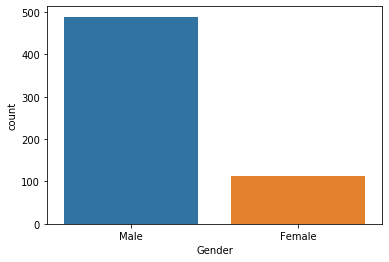

In [5]:
# We can plot some graphs between different variables to understand our data better
sns.countplot(x = "Gender", data = data)
plt.show()

### We have more of male loan seekers in comparison to the female counterpart

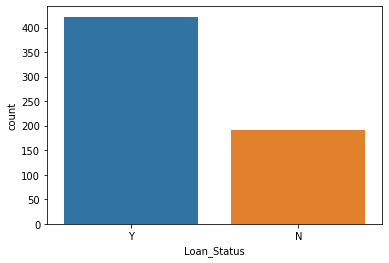

In [6]:
sns.countplot(x = "Loan_Status", data = data)
plt.show()

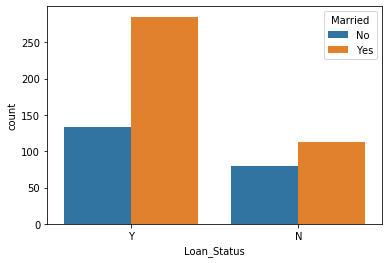

In [7]:
sns.countplot(x = "Loan_Status", hue = "Married", data = data)
plt.show()

### high chance of loan being given to married people

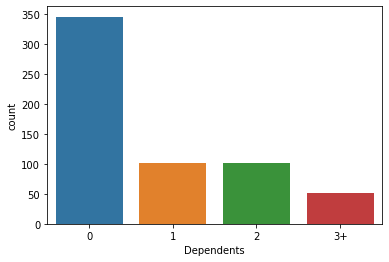

In [8]:
sns.countplot(x = "Dependents", data = data)
plt.show()

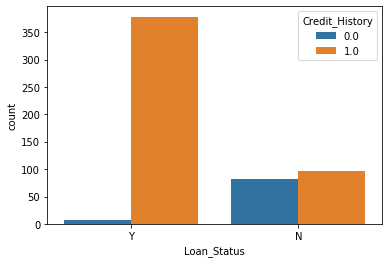

In [9]:
sns.countplot(x = "Loan_Status", hue = "Credit_History", data = data)
plt.show()
#credit history is important factor for the loan prediction.

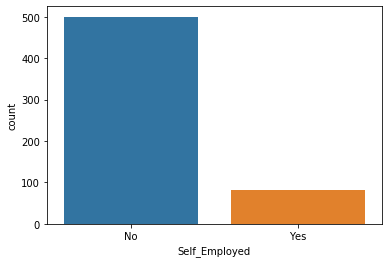

In [10]:
sns.countplot(x = "Self_Employed", data = data)
plt.show()

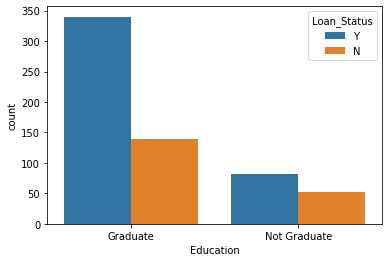

In [11]:
sns.countplot(x = "Education", hue = "Loan_Status", data = data)
plt.show()

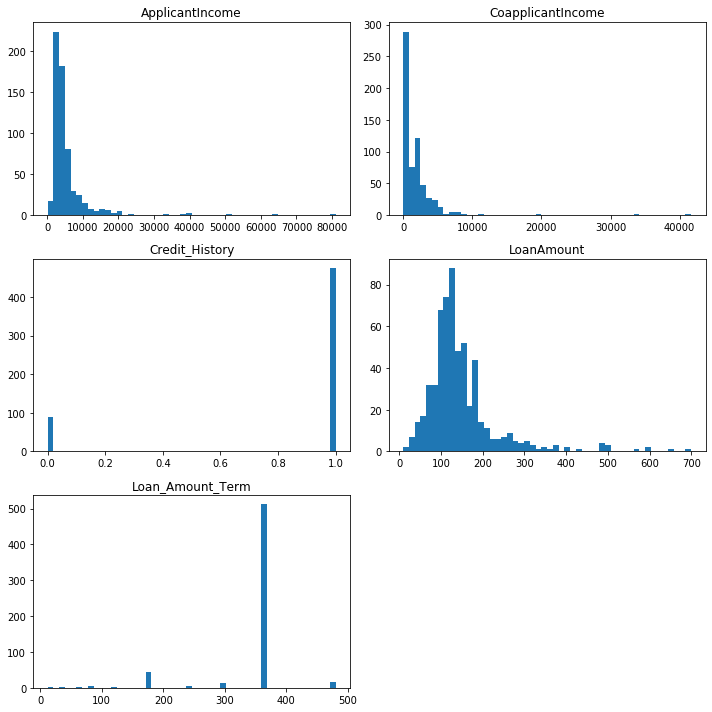

In [12]:
data.hist(bins = 50,figsize = (10,10),grid = False)
plt.tight_layout()
plt.show()

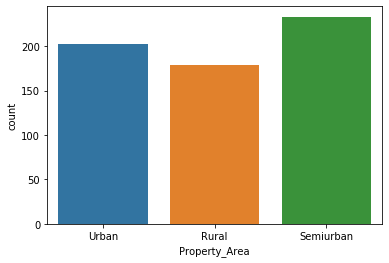

In [13]:
sns.countplot(x = "Property_Area", data = data)
plt.show()

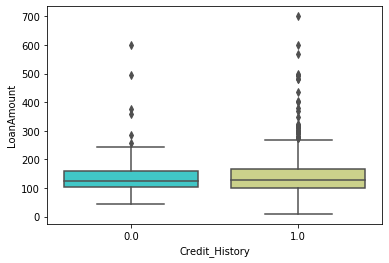

In [14]:
sns.boxplot(x = "Credit_History", y ="LoanAmount", palette = "rainbow", data = data)

## filling naN values

In [15]:
data.LoanAmount.fillna(data.LoanAmount.mean(), inplace = True)

In [16]:
data.Gender.fillna("Male", inplace = True)

In [17]:
data.Married.fillna(data.Married.mode()[0], inplace = True)

In [18]:
data.Dependents.fillna('0', inplace = True)

In [19]:
data.Self_Employed.fillna("No", inplace = True)

In [20]:
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(), inplace = True)

In [21]:
data.Credit_History.fillna(0.0, inplace = True)

In [22]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
# Removing outliers
data["log_LoanAmount"] = np.log(data.LoanAmount)

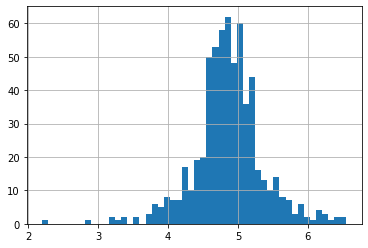

In [25]:
data.log_LoanAmount.hist(bins = 50)
plt.show()

In [26]:
# adding incomes to create a generalised income
data["totalIncome_log"] = np.log(data.ApplicantIncome + data.CoapplicantIncome)

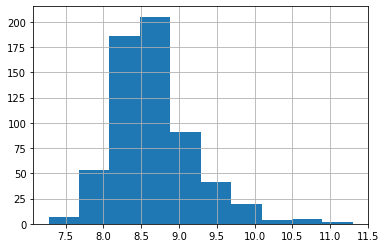

In [28]:
data.totalIncome_log.hist()

In [29]:
#drooping data that can be considered less helpful in rendering any helpful prediction
data = data.drop(["Loan_ID", "ApplicantIncome", "CoapplicantIncome", "LoanAmount"], axis = 1)

In [30]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,totalIncome_log
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,4.986426,8.674026
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,4.787492,8.505323
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,4.948760,8.699515


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,roc_curve,classification_report,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split,cross_val_score
%matplotlib inline

In [32]:
from sklearn.preprocessing import LabelEncoder
cat_column = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Le = LabelEncoder()

for i in cat_column:
    data[i] = Le.fit_transform(data[i])

In [34]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,totalIncome_log
0,1,0,0,0,0,360.0,1.0,2,1,4.986426,8.674026
1,1,1,1,0,0,360.0,1.0,0,0,4.852030,8.714568
2,1,1,0,0,1,360.0,1.0,2,1,4.189655,8.006368
3,1,1,0,1,0,360.0,1.0,2,1,4.787492,8.505323
4,1,0,0,0,0,360.0,1.0,2,1,4.948760,8.699515


In [36]:
train = data
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_LoanAmount,totalIncome_log
0,1,0,0,0,0,360.0,1.0,2,1,4.986426,8.674026
1,1,1,1,0,0,360.0,1.0,0,0,4.852030,8.714568
2,1,1,0,0,1,360.0,1.0,2,1,4.189655,8.006368
3,1,1,0,1,0,360.0,1.0,2,1,4.787492,8.505323
4,1,0,0,0,0,360.0,1.0,2,1,4.948760,8.699515


In [37]:
train.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [38]:
from sklearn.utils import resample
data_major = train[train.Loan_Status==1]
data_minor = train[train.Loan_Status==0]
data_upscale = resample(data_minor,replace= True,n_samples=422)
train=pd.concat([data_major,data_upscale])

In [40]:
train.shape

(844, 11)

In [41]:
def roc_curve_do(c_name,classifier,x_test,y_test):
    probs = classifier.predict_proba(x_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs)
    plt.plot(fper, tper)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC curve'.format(c_name))
  # show the plot
    plt.show()

def kfold(classifier,X,Y,cv):
    score=cross_val_score(classifier,X,Y,cv=cv)
    print("Individual Score:",score)
    print("Mean Score:",score.mean()*100,"%")
  # plot
    plt.plot(np.arange(cv), score, 'o-', linewidth=1)
    plt.title("Accuracy: %f%% and Deviation (%f%%)" % (score.mean()*100, score.std()*100))
    plt.xlabel('number of Folds')
    plt.ylabel('Accuracy score')
    plt.show()

def all_score(classifier,x_test,y_test,x_train,y_train):
    predict=classifier.predict(x_test)
    print("testing accuracy:",accuracy_score(y_test,predict))
    print("training accuracy:",accuracy_score(y_train,classifier.predict(x_train)))
    print(confusion_matrix(y_test,predict))
    print("Classification report:\n",classification_report(y_test,predict))

In [42]:
xtrain = train.drop(["Loan_Status"],axis=1)
ytrain = train["Loan_Status"]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(xtrain,ytrain,test_size=0.2)

In [44]:
model = LogisticRegression(max_iter=200)
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

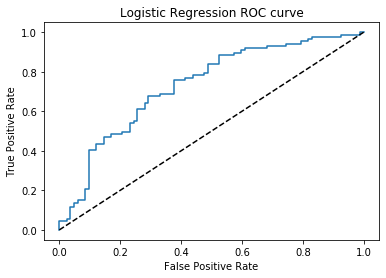

Individual Score: [0.75739645 0.63905325 0.68639053 0.62721893 0.64880952]
Mean Score: 67.17737390814314 %


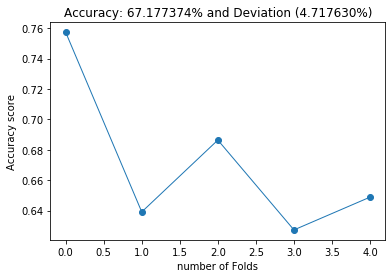

testing accuracy: 0.6627218934911243
training accuracy: 0.6859259259259259
[[43 39]
 [18 69]]
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.52      0.60        82
           1       0.64      0.79      0.71        87

    accuracy                           0.66       169
   macro avg       0.67      0.66      0.65       169
weighted avg       0.67      0.66      0.66       169



In [45]:
roc_curve_do("Logistic Regression",model,x_test,y_test)
kfold(model,xtrain,ytrain,5)
all_score(model,x_test,y_test,x_train,y_train)

In [46]:
model1 = RandomForestClassifier(n_estimators=200)
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

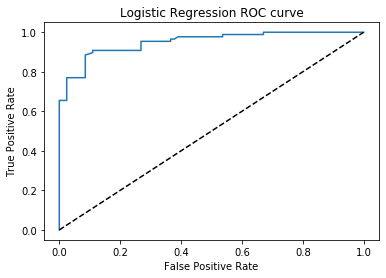

Individual Score: [0.9112426  0.86982249 0.87573964 0.85207101 0.9047619 ]
Mean Score: 88.27275288813749 %


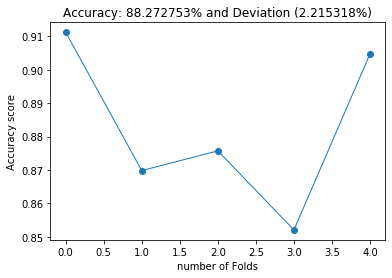

testing accuracy: 0.8579881656804734
training accuracy: 1.0
[[78  4]
 [20 67]]
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.95      0.87        82
           1       0.94      0.77      0.85        87

    accuracy                           0.86       169
   macro avg       0.87      0.86      0.86       169
weighted avg       0.87      0.86      0.86       169



In [47]:
roc_curve_do("Logistic Regression",model1,x_test,y_test)
kfold(model1,xtrain,ytrain,5)
all_score(model1,x_test,y_test,x_train,y_train)

In [48]:
parameters =  ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','log_LoanAmount','totalIncome_log']
featimp = pd.Series(model1.feature_importances_, index=parameters).sort_values(ascending=False)
print (featimp)

totalIncome_log     0.281543
log_LoanAmount      0.264609
Credit_History      0.161862
Property_Area       0.063383
Dependents          0.058279
Loan_Amount_Term    0.049801
Married             0.032389
Gender              0.032027
Education           0.031187
Self_Employed       0.024919
dtype: float64


In [49]:
new_train = train.drop(['Property_Area','Married','Education','Gender','Self_Employed','Dependents','Loan_Amount_Term'],axis=1)

In [51]:
new_train.head()

,Credit_History,Loan_Status,log_LoanAmount,totalIncome_log
0,1.0,1,4.986426,8.674026
2,1.0,1,4.189655,8.006368
3,1.0,1,4.787492,8.505323
4,1.0,1,4.948760,8.699515
5,1.0,1,5.587249,9.170872


In [52]:
new_xtrain = new_train.drop(["Loan_Status"],axis=1)
new_ytrain = new_train["Loan_Status"]

In [53]:
new_xtrain.head()

,Credit_History,log_LoanAmount,totalIncome_log
0,1.0,4.986426,8.674026
2,1.0,4.189655,8.006368
3,1.0,4.787492,8.505323
4,1.0,4.948760,8.699515
5,1.0,5.587249,9.170872


In [54]:
x_newtrain,x_newtest,y_newtrain,y_newtest = train_test_split(new_xtrain,new_ytrain,test_size=0.2)

In [55]:
model2 = RandomForestClassifier(n_estimators=150)

In [56]:
model2.fit(x_newtrain,y_newtrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

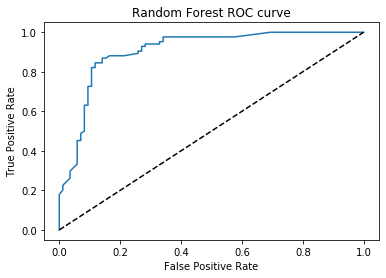

Individual Score: [0.86390533 0.85207101 0.81065089 0.84615385 0.875     ]
Mean Score: 84.95562130177514 %


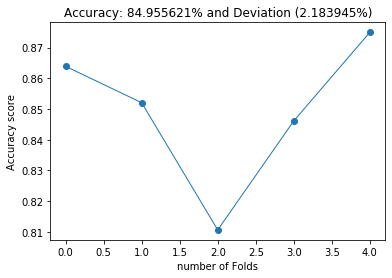

testing accuracy: 0.8165680473372781
training accuracy: 1.0
[[76  9]
 [22 62]]
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        85
           1       0.87      0.74      0.80        84

    accuracy                           0.82       169
   macro avg       0.82      0.82      0.82       169
weighted avg       0.82      0.82      0.82       169



In [57]:
roc_curve_do("Random Forest",model2,x_newtest,y_newtest)
kfold(model2,new_xtrain,new_ytrain,5)
all_score(model2,x_newtest,y_newtest,x_newtrain,y_newtrain)